In [1]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.nasdaq_trader as nasdaq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Following this strongly https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/

start_day = datetime(2016, 1, 1)
end_day = datetime(2016, 12, 31)
num_of_days = (end_day - start_day).days
print(num_of_days)



365


In [3]:


# tickers = ['AAPL.O','IBM.N','GOOG.O','BP.N','XOM.N','COST.O','GS.N'] 
tickers = ['AAPL','IBM','GOOG','BP','XOM','COST','GS'] 
data = pdr.get_data_yahoo(tickers, 
                 start=start_day, 
                 end=end_day)#datetime.today().strftime('%Y-%m-%d'))



In [4]:
weights = np.array([.15, .2, .2, .15,0.10,0.15,0.05])

In [5]:
print(f"Sum of weights: {sum(weights)}")

Sum of weights: 1.0


In [6]:
closes = data['Adj Close']
returns = closes.pct_change().dropna()

In [7]:
closes.head()

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-12-31,24.130859,97.147446,37.944000,20.587618,56.216614,141.844345,180.229996
2016-01-04,24.151493,95.968567,37.091999,20.455898,55.863232,140.122910,177.139999
2016-01-05,23.546274,95.897972,37.129002,20.370277,56.339214,140.465439,174.089996
2016-01-06,23.085482,95.417976,37.181000,19.955364,55.870453,139.165573,169.839996
2016-01-07,22.111168,93.787323,36.319500,19.382387,54.976170,135.977386,164.619995


In [8]:
returns.head()

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2016-01-04,0.000855,-0.012135,-0.022454,-0.006398,-0.006286,-0.012136,-0.017145
2016-01-05,-0.025059,-0.000736,0.000998,-0.004186,0.008521,0.002444,-0.017218
2016-01-06,-0.019570,-0.005005,0.001400,-0.020369,-0.008320,-0.009254,-0.024413
2016-01-07,-0.042205,-0.017090,-0.023170,-0.028713,-0.016006,-0.022909,-0.030735
2016-01-08,0.005288,-0.009258,-0.016410,-0.017669,-0.020202,-0.017504,-0.004131


In [9]:
# Returns stats for a portfolio


avg_rets = returns.mean()
port_mean = avg_rets.dot(weights)
port_stdev = returns.std().dot(weights)
print(port_mean, port_stdev)



0.0006400279087806361 0.013696977640286299


In [10]:


cov_matrix = returns.cov()
annulaised_cov_mat = cov_matrix * 247

In [11]:
portfolio_variance = np.transpose(weights)@cov_matrix@weights

In [12]:
portfolio_volatility = np.sqrt(portfolio_variance)

In [13]:
print(f"portfolio_variance: {portfolio_variance}")
print(f"portfolio_volatility: {portfolio_volatility}")

portfolio_variance: 8.2136213906143e-05
portfolio_volatility: 0.00906290317206043


## Now to explore the expected returns at different risk levels

In [14]:
port_returns = []
port_volatility = []
port_weights = []

num_assets = len(closes.columns)
num_portfolios = 10000

individual_rets = closes.resample('Y').last().pct_change().mean()

In [15]:
individual_rets

Symbols
AAPL    0.124804
IBM     0.252109
GOOG    0.017051
BP      0.289472
XOM     0.198821
COST    0.002778
GS      0.328580
dtype: float64

In [17]:
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    
    weights = weights / np.sum(weights)
    
    port_weights.append(weights)
    
    returns = np.dot(weights,individual_rets)
    port_returns.append(returns)
    
    var = annulaised_cov_mat.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    
    sd = np.sqrt(var)
    
    ann_sd = sd*np.sqrt(250)
    
    port_volatility.append(ann_sd)
    .mul(weights, axis=1).sum().sum()
# #         print(f"var {var}")
#         sd = np.sqrt(var)
# #         print(f"sd: {sd}")
#         #Standard dev across time interval of days
#         ann_sd = sd*np.sqrt(interval)

AttributeError: 'NoneType' object has no attribute 'mul'

In [18]:
res = {
    "Returns": port_returns,
    "Volatility": port_volatility
}

for counter, symbol in enumerate(closes.columns.tolist()):
    print(symbol)
    res[symbol + ' weight'] = [w[counter] for w in port_weights]

AAPL
IBM
GOOG
BP
XOM
COST
GS


In [19]:
res

{'Returns': [0.15881147830334066],
 'Volatility': [2.2835260524925736],
 'AAPL weight': [0.049981138127246055],
 'IBM weight': [0.22569447651096122],
 'GOOG weight': [0.20555514781745893],
 'BP weight': [0.028262065880383134],
 'XOM weight': [0.034521230894785745],
 'COST weight': [0.223152339533344],
 'GS weight': [0.23283360123582084]}

In [20]:
port_v1 = pd.DataFrame(res)
port_v1.head()

,Returns,Volatility,AAPL weight,IBM weight,GOOG weight,BP weight,XOM weight,COST weight,GS weight
0,0.158811,2.283526,0.049981,0.225694,0.205555,0.028262,0.034521,0.223152,0.232834


/Users/blongtran/Documents/GitHub/gic22-private-market-valuation/flask-server/env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Expected Returns')

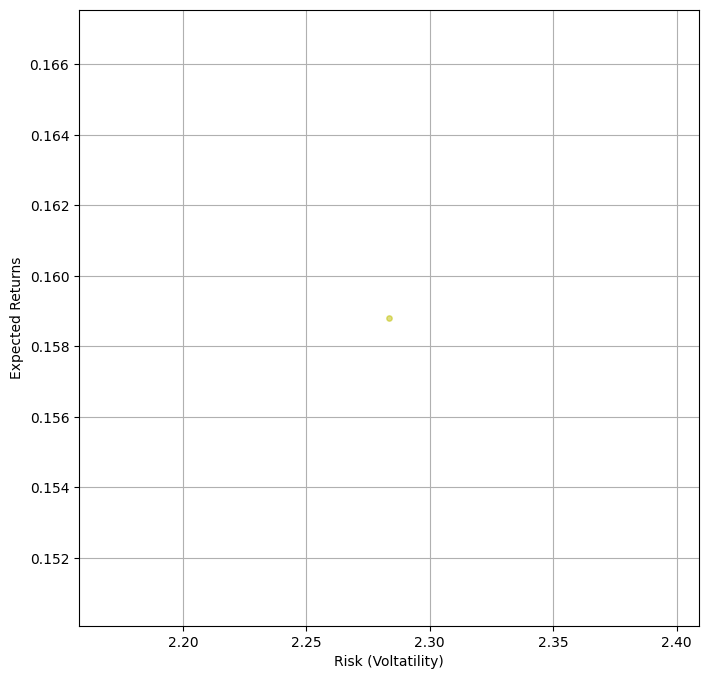

In [21]:
port_v1.plot.scatter(x='Volatility', y='Returns', marker='o', color='y', s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.xlabel("Risk (Voltatility)")
plt.ylabel("Expected Returns")

## How to apply this result to our hack perhaps

1. We can suggest the best returns for the stipulated risk
2. Suggest the best risk for a given return
3. Portfolio with max sharpe ratio + sortino ratio

In [61]:
# Min volatility
min_vol_port = port_v1.iloc[port_v1['Volatility'].idxmin()]
min_vol_port # Funny that the expected returns after a year is 12%, pretty damn high. But the goddamn volatility so bad compared to example cuz this is across the year.

Returns        0.120233
Volatility     2.032281
AAPL weight    0.082752
IBM weight     0.154144
GOOG weight    0.206386
BP weight      0.012620
XOM weight     0.256956
COST weight    0.251518
GS weight      0.035624
Name: 2873, dtype: float64

In [62]:
# Highest Sharpe Ratio
rf = 0.01
optimal_risky_port = port_v1.iloc[((port_v1['Returns']-rf) / port_v1['Volatility']).idxmax()]
optimal_risky_port


Returns        0.259814
Volatility     2.692687
AAPL weight    0.020765
IBM weight     0.375120
GOOG weight    0.011023
BP weight      0.057464
XOM weight     0.194696
COST weight    0.025380
GS weight      0.315552
Name: 7953, dtype: float64

## Let's give a scenario where we want to reallocate portfolio on an interval basis

In [206]:
def generate_rand_ports(data, num_portfolios = 10000, interval = 14, is_short_allowed = False):
    port_returns = []
    port_volatility = []
    port_weights = []

    num_assets = len(data.columns)
#     print("RESAMPLING")
#     print(data.resample('T').last())
# extracts first and last row
    individual_rets = data.iloc[[0, -1]].pct_change().dropna()#.resample('D').last().pct_change().dropna()#.mean()  #data.pct_change().dropna()#
    print("individual_rets")
    print(individual_rets.head(interval))
    
#     cov_matrix = returns.cov()
    returns = data.pct_change().dropna()
    var_mat = returns.cov() * interval
    print("var_mat")
    print(var_mat)
    
    individual_rets = individual_rets.mean() 
    if (is_short_allowed):
        print(f"APPLYING NECESSARY SHORTING")
        individual_rets = individual_rets.abs()
#     else:
#         # If all returns expected to be negative, then just dont invest
#         if((individual_rets.values < 0).all()):
            
    print("Mean rets")
    print(individual_rets)
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)

        weights = weights / np.sum(weights)
#         print(f"weights sum: {np.sum(weights)}")
        port_weights.append(weights)

        returns = np.dot(weights,individual_rets)
        port_returns.append(returns)

#         var = var_mat.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
# #         print(f"var {var}")
#         sd = np.sqrt(var)
# #         print(f"sd: {sd}")
#         #Standard dev across time interval of days
#         ann_sd = sd*np.sqrt(interval)

        portfolio_variance = np.transpose(weights)@var_mat@weights
        portfolio_volatility = np.sqrt(portfolio_variance)
        
        port_volatility.append(portfolio_volatility)
        # To convert to short, just flip the negative returns 
    
#     print(port_volatility)
    res = {
        "Returns": port_returns,
        "Volatility": port_volatility
    }

    for counter, symbol in enumerate(data.columns.tolist()):
        print(symbol)
        res[symbol + ' weight'] = [w[counter] for w in port_weights]
    
    finalDf = pd.DataFrame(res)
    print(finalDf.head())
    
    return finalDf

In [209]:
interval = 30 #number of days.
rand_ports = []

for i in range(0,len(closes.index), interval):
    print(i)
    last_idx = min(i + interval, len(closes.index) - 1)
    cur_df = closes.iloc[i:last_idx,:]
#     print(closes.head(1000))
    print(cur_df.head(1000))
#     print(cur_df.describe())
    rand_ports.append(generate_rand_ports(cur_df,10000, last_idx - idx + 1, True))

0
Symbols          AAPL         IBM       GOOG         BP        XOM  \
Date                                                                 
2015-12-31  24.130861   97.147446  37.944000  20.587616  56.216602   
2016-01-04  24.151497   95.968597  37.091999  20.455902  55.863216   
2016-01-05  23.546272   95.897995  37.129002  20.370281  56.339226   
2016-01-06  23.085487   95.417969  37.181000  19.955364  55.870441   
2016-01-07  22.111172   93.787331  36.319500  19.382387  54.976154   
2016-01-08  22.228086   92.919052  35.723499  19.039925  53.865528   
2016-01-11  22.588013   94.048500  35.801498  18.993820  53.144352   
2016-01-12  22.915842   93.815552  36.303501  18.868690  54.233318   
2016-01-13  22.326668   92.594330  35.028000  18.947716  54.557873   
2016-01-14  22.814964   93.822624  35.736000  20.304422  57.060398   
2016-01-15  22.267056   91.789597  34.722500  19.204565  55.949783   
2016-01-19  22.159311   90.434242  35.089500  19.046507  55.098759   
2016-01-20  22.189

AAPL
IBM
GOOG
BP
XOM
COST
GS
    Returns  Volatility  AAPL weight  IBM weight  GOOG weight  BP weight  \
0  0.045182    0.083470     0.112150    0.343258     0.021122   0.027604   
1  0.080938    0.079106     0.175059    0.083229     0.345725   0.034960   
2  0.075815    0.078951     0.095151    0.137940     0.297180   0.153494   
3  0.069185    0.082499     0.058871    0.168798     0.061407   0.230682   
4  0.062410    0.073846     0.122918    0.196534     0.153544   0.050163   

   XOM weight  COST weight  GS weight  
0    0.014917     0.282983   0.197968  
1    0.262506     0.006936   0.091586  
2    0.173616     0.059396   0.083222  
3    0.195861     0.168137   0.116244  
4    0.181822     0.181184   0.113834  
120
Symbols          AAPL         IBM       GOOG         BP        XOM  \
Date                                                                 
2016-06-23  22.285341  111.852501  35.093498  23.726990  67.367401   
2016-06-24  21.659218  105.545280  33.761002  22.596479  65.

AAPL
IBM
GOOG
BP
XOM
COST
GS
    Returns  Volatility  AAPL weight  IBM weight  GOOG weight  BP weight  \
0  0.084690    0.133234     0.187076    0.044933     0.235681   0.260861   
1  0.083005    0.125002     0.251042    0.137476     0.141926   0.176853   
2  0.088433    0.126014     0.126959    0.024764     0.253255   0.137289   
3  0.075242    0.129580     0.160537    0.107646     0.126174   0.186177   
4  0.046710    0.137719     0.049304    0.343947     0.165674   0.205015   

   XOM weight  COST weight  GS weight  
0    0.028009     0.085857   0.157584  
1    0.000358     0.185385   0.106959  
2    0.273107     0.033898   0.150729  
3    0.035307     0.173029   0.211130  
4    0.022059     0.077614   0.136387  
180
Symbols          AAPL         IBM       GOOG         BP        XOM  \
Date                                                                 
2016-09-19  26.481588  112.469978  38.285000  23.330133  62.043243   
2016-09-20  26.479258  112.164940  38.570499  23.071993  61.

AAPL
IBM
GOOG
BP
XOM
COST
GS
    Returns  Volatility  AAPL weight  IBM weight  GOOG weight  BP weight  \
0  0.150604    0.108488     0.164726    0.145048     0.070952   0.066304   
1  0.159402    0.113529     0.091614    0.133931     0.045324   0.035369   
2  0.078563    0.103295     0.157822    0.230129     0.237917   0.087232   
3  0.095213    0.103532     0.364593    0.222313     0.091414   0.025933   
4  0.125675    0.106265     0.168818    0.137291     0.164781   0.175278   

   XOM weight  COST weight  GS weight  
0    0.168732     0.138324   0.245914  
1    0.281797     0.161373   0.250592  
2    0.136984     0.092343   0.057574  
3    0.101340     0.058486   0.135922  
4    0.058403     0.113761   0.181668  
240
Symbols          AAPL         IBM       GOOG         BP        XOM  \
Date                                                                 
2016-12-13  26.994854  123.324631  39.805000  26.128143  69.125916   
2016-12-14  26.994854  123.485855  39.853500  25.581291  67.

    Returns  Volatility  AAPL weight  IBM weight  GOOG weight  BP weight  \
0  0.058234    0.094683     0.110677    0.216078     0.096050   0.150891   
1  0.053431    0.091506     0.111244    0.237930     0.239779   0.111180   
2  0.054912    0.096319     0.050721    0.079389     0.224483   0.161904   
3  0.056083    0.111091     0.229211    0.020637     0.117349   0.200977   
4  0.067835    0.092163     0.138005    0.247822     0.130199   0.049665   

   XOM weight  COST weight  GS weight  
0    0.189473     0.190356   0.046476  
1    0.182151     0.112390   0.005327  
2    0.094705     0.221788   0.167011  
3    0.041225     0.143046   0.247556  
4    0.270702     0.107665   0.055942  
    Returns  Volatility  AAPL weight  IBM weight  GOOG weight  BP weight  \
0  0.045182    0.083470     0.112150    0.343258     0.021122   0.027604   
1  0.080938    0.079106     0.175059    0.083229     0.345725   0.034960   
2  0.075815    0.078951     0.095151    0.137940     0.297180   0.153494   

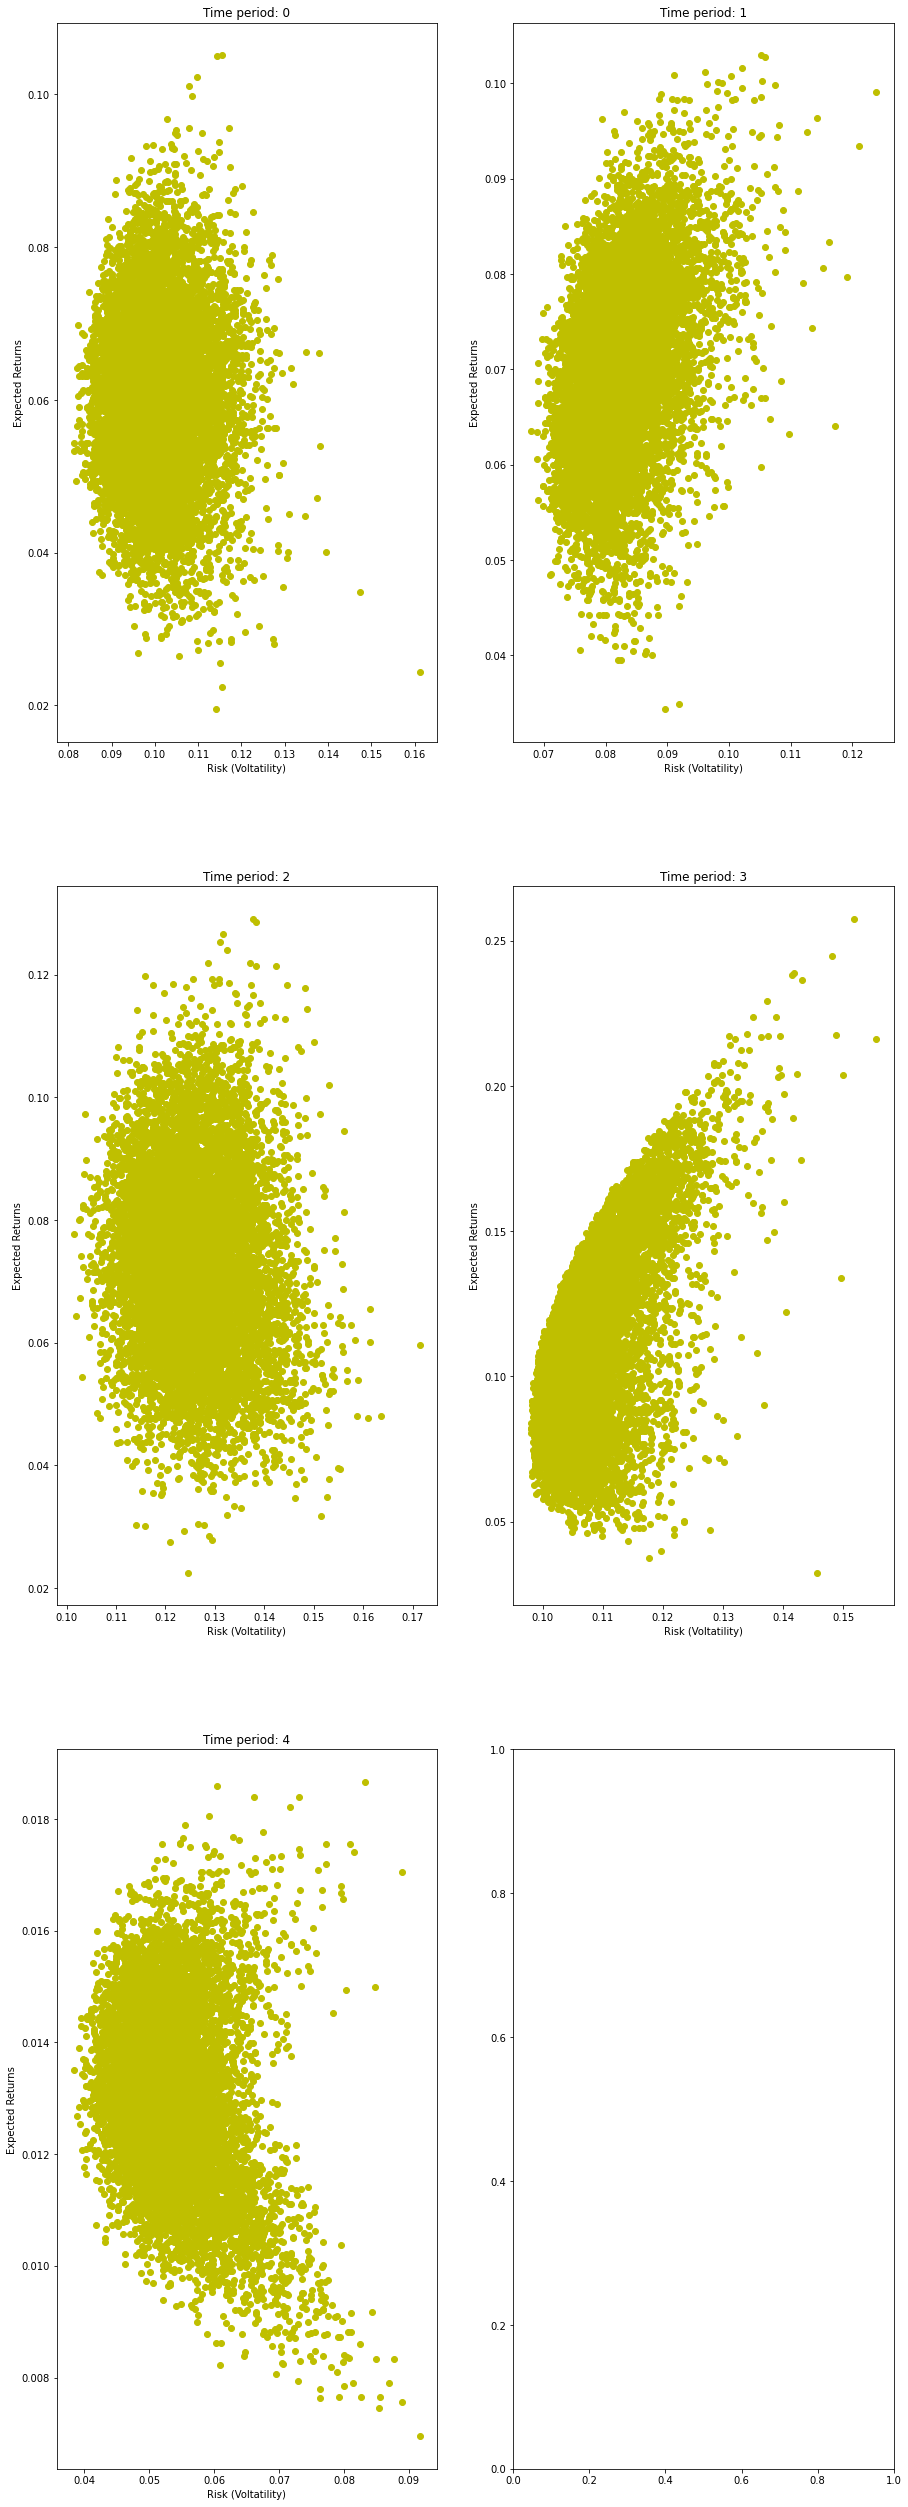

In [210]:
num_of_y = len(rand_ports) // 2 + 1
fig, axs = plt.subplots(num_of_y, 2, figsize=(15, 15 * num_of_y))
for idx, port in enumerate(rand_ports):
#     print(f"idx{idx}")
    print(port.head())
    cur_ax = axs[idx // 2, idx % 2]
    cur_ax.scatter(x=port['Volatility'], y=port['Returns'], marker='o', color='y')
    cur_ax.set(xlabel="Risk (Voltatility)", ylabel="Expected Returns")
    cur_ax.plot()
    cur_ax.set_title(f'Time period: {idx}')

plt.show()